# 概览(Brief):20241108

In [1]:
repday='20241108'
lastday='20241107'

## 1. 新闻
###  1.1 新浪财经首页截屏

In [2]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service as EdgeService
from webdriver_manager.microsoft import EdgeChromiumDriverManager
import time
import os

#sina.png保存首页财经新闻截图
def getSinaShot():
    sinafile='sina.png'
    if not os.path.exists(sinafile):
        driver = webdriver.Edge(service=EdgeService(EdgeChromiumDriverManager().install()))
        driver.implicitly_wait(10)
        driver.get("https://finance.sina.com.cn")
        time.sleep(5)
        popup=driver.find_element(By.CLASS_NAME,"SNP-layer")
        if popup:
            driver.find_element(By.CLASS_NAME,"snp-btn-close-new").click()

        #移动到新闻关键页面位置
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight/20);")
        driver.save_screenshot(sinafile)
        driver.close()
    
getSinaShot()

![首页新闻](sina.png)

### 1.2 东方财富国内早盘新闻 

In [3]:
import akshare as ak
from datetime import datetime,time
import pandas as pd

news_dfgn = ak.stock_info_cjzc_em()
news_dfgn['发布时间']=pd.to_datetime(news_dfgn['发布时间'])
news_dfgn[news_dfgn['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,东方财富财经早餐 11月18日周一,【东方财富财经早餐 11月18日周一】1、习近平同美国总统拜登在利马举行会晤。2、《求是》杂...,2024-11-18 06:00:36,http://finance.eastmoney.com/a/202411173241825...
1,东方财富财经早餐 11月15日周五,【财经早餐】1、李强签署国务院令，公布修订后的《国家自然科学基金条例》。2、6G推进组组长：...,2024-11-15 06:00:39,http://finance.eastmoney.com/a/202411153240130...
2,东方财富财经早餐 11月14日周四,【财经早餐】1、住房交易税收新政，三部委官宣购买140平以下房产契税降到1%。2、全球6G创...,2024-11-14 06:00:03,http://finance.eastmoney.com/a/202411143238772...
3,东方财富财经早餐 11月13日周三,【财经早餐】1、2025年放假安排来了，春节和劳动节各增1天。2、张国清：推动国企进一步突出...,2024-11-13 06:00:24,http://finance.eastmoney.com/a/202411123237445...
4,东方财富财经早餐 11月12日周二,【财经早餐】1、潘功胜：完善应对股票市场异常波动等政策工具，维护金融市场平稳健康运行。2、央...,2024-11-12 06:00:20,http://finance.eastmoney.com/a/202411113236043...
5,东方财富财经早餐 11月11日周一,【财经早餐】1、财政部部长蓝佛安：今年起直接增加地方化债资源10万亿元。2、国常会审议通过《...,2024-11-11 06:00:50,http://finance.eastmoney.com/a/202411103234805...
6,东方财富财经早餐 11月8日周五,【财经早餐】1、美联储宣布降息25个基点，鲍威尔称可能有必要放缓降息步伐。2、证监会副主席李...,2024-11-08 06:00:00,http://finance.eastmoney.com/a/202411083233044...
7,东方财富财经早餐 11月7日周四,【财经早餐】1、特朗普宣布在2024年美国总统选举中获胜。2、工信部对新型储能制造业高质量发...,2024-11-07 06:00:40,http://finance.eastmoney.com/a/202411063231504...


### 1.3 东方财富国际新闻

In [4]:
news_dfgj = ak.stock_info_global_em()
news_dfgj['发布时间']=pd.to_datetime(news_dfgj['发布时间'])
news_dfgj[news_dfgj['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,市值管理指引发布 红利低波ETF涨超2.2%,【市值管理指引发布 红利低波ETF涨超2.2%】红利低波ETF（512890）持续上涨，现涨...,2024-11-18 10:35:50,https://finance.eastmoney.com/a/20241118324258...
1,中国结算董事长于文强：支持香港市场探索推进T+1交收改革,【中国结算董事长于文强：支持香港市场探索推进T+1交收改革】中国证券登记结算有限责任公司董事...,2024-11-18 10:31:42,https://finance.eastmoney.com/a/20241118324255...
2,泰国第三季度GDP环比增长1.2% 预估为增长0.8%,泰国第三季度GDP环比增长1.2%，预估为增长0.8%。泰国第三季度GDP同比增长3%，预估...,2024-11-18 10:31:27,https://finance.eastmoney.com/a/20241118324256...
3,韩国股市突然暴拉！发生了什么？,【韩国股市突然暴拉！发生了什么？】就在刚才，韩国两大股指全线暴拉。韩国综合指数涨幅扩大至2%...,2024-11-18 10:30:26,https://finance.eastmoney.com/a/20241118324255...
4,券商股盘中大面积翻红上涨,券商股盘中大面积翻红上涨，红塔证券、国投资本、东吴证券等涨幅靠前。,2024-11-18 10:27:06,https://finance.eastmoney.com/a/20241118324252...
...,...,...,...,...
195,中美政党对话举行：中美双方应保持接触沟通 妥善管控分歧,【中美政党对话举行：中美双方应保持接触沟通 妥善管控分歧】据中联部消息，11月17日，202...,2024-11-17 19:26:03,https://finance.eastmoney.com/a/20241117324179...
196,中信建投：市值管理指引正式稿发布 利好建筑央国企价值发现,【中信建投：市值管理指引正式稿发布 利好建筑央国企价值发现】中信建投研报指出，市值管理指引的...,2024-11-17 19:06:14,https://finance.eastmoney.com/a/20241117324178...
197,南山智尚：申请向特定对象发行股票获深交所上市审核中心审核通过,【南山智尚：申请向特定对象发行股票获深交所上市审核中心审核通过】南山智尚公告，深交所发行上市...,2024-11-17 19:05:20,https://finance.eastmoney.com/a/20241117324178...
198,沪市披露利用专项贷款进行增持回购公告已达78份,【沪市披露利用专项贷款进行增持回购公告已达78份】沪市上市公司回购或股东增持贷款申请有实质性...,2024-11-17 19:03:05,https://finance.eastmoney.com/a/20241117324178...


### 1.4 新浪国际财经

In [5]:
news_sinagj = ak.stock_info_global_sina()
news_sinagj['时间']=pd.to_datetime(news_sinagj['时间'])
news_sinagj[news_sinagj['时间']>lastday]

,时间,内容
0,2024-11-18 10:37:44,【东风设计研究院执行总经理裴侠风等2人被查】据东风公司纪委、监察专员办，湖北省十堰市监委消息...
1,2024-11-18 10:37:33,【四川雅江突发森林火灾 正在全力扑救】11月17日23时，四川省甘孜州雅江县木绒乡安桂村附近...
2,2024-11-18 10:37:16,【港交所行政总裁陈翊庭：有接近77%的外资通过沪深港通持有A股股票】港交所行政总裁陈翊庭11...
3,2024-11-18 10:37:01,【印度放宽大米出口带动全球米价下跌】近日，全球大米出口价格下跌，亚洲国家尤为明显，其背后直接...
4,2024-11-18 10:36:36,【白城滑冰馆坍塌暂无伤亡报告，当地正在现场调查】11月18日，有网友发布视频反映，当天早上7...
5,2024-11-18 10:35:46,【上海：关于取消普通住房标准有关事项的通知】为更好满足居民刚性和改善性住房需求，本市取消普通...
6,2024-11-18 10:35:24,新加坡铁矿石期货主力合约涨超3%，现报99.7美元/吨。大商所铁矿石期货主力合约涨近2%，现...
7,2024-11-18 10:35:12,上海钢联发布数据显示，今日电池级碳酸锂价格较上日下跌1750元，均价报7.83万元/吨。
8,2024-11-18 10:34:59,泰国第三季度失业率为1.02%，第二季度为1.07%。
9,2024-11-18 10:34:34,泰国国家规划机构：2024年外国游客预计将达到3600万人次（8月预测为3650万人次），2...


## 2. 市场趋势
### 2.1 国际股票市场
#### 2.1.1 港股：恒生指数（HSI）

In [6]:
stock_hk_daily_hfq_df = ak.stock_hk_daily(symbol="HSI", adjust="")
stock_hk_daily_hfq_df

,date,open,high,low,close,volume
0,2013-08-20,22396.289,22481.740,21907.211,21964.051,6.352194e+10
1,2013-08-21,21964.689,21970.250,21618.600,21817.730,7.237452e+09
2,2013-08-22,21538.189,21944.471,21538.189,21895.400,8.229203e+09
3,2013-08-23,22006.410,22103.900,21769.039,21863.510,7.544465e+09
4,2013-08-26,21943.400,22116.000,21898.150,22005.320,7.672642e+09
...,...,...,...,...,...,...
2763,2024-11-11,20258.140,20505.010,20151.380,20426.930,1.675378e+10
2764,2024-11-12,20334.090,20517.240,19761.310,19846.881,1.984462e+10
2765,2024-11-13,19671.920,19840.280,19608.320,19823.449,1.350633e+10
2766,2024-11-14,19626.260,19859.170,19392.590,19435.811,1.565207e+10


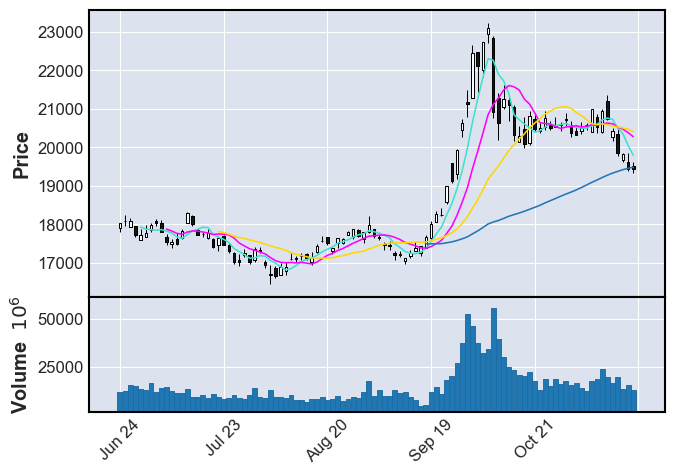

In [7]:
import mplfinance as mpf
import pandas as pd

# plot the stock DataFrame
# df: the DataFrame
# OCHLDict: {'columnName in Oiginal DF':'standard OCHLV names (initial capital)'}
def plotStock(df,OCHLVDict):
    #column
    gt_ul_index_plot=df.rename(columns=OCHLVDict)
    gt_ul_index_plot['Date']=pd.to_datetime(gt_ul_index_plot['Date'])
    gt_ul_index_plot=gt_ul_index_plot.set_index('Date')
    mpf.plot(gt_ul_index_plot,type='candle',volume=True,mav=(5,10,20,60,120,250))

#plot sina stock chart
def plotSinaStock(df,days):
    OCHLVDict={}
    for key in df.columns.to_list():
        new_key = key[0].upper() + key[1:].lower()
        OCHLVDict[key] = new_key
    plotStock(df.tail(days),OCHLVDict)
    
plotSinaStock(stock_hk_daily_hfq_df,100)

#### 2.1.2 美国道琼斯

In [8]:
stock_dji_daily_df = ak.stock_us_daily(symbol=".DJI", adjust="")
stock_dji_daily_df

,date,open,high,low,close,volume
0,2004-01-02,10452.7402,10554.9600,10367.4102,10409.8496,168890000.0
1,2004-01-05,10411.8496,10575.9199,10411.8496,10544.0703,221290000.0
2,2004-01-06,10543.8496,10584.0703,10454.3701,10538.6602,191460000.0
3,2004-01-07,10535.4600,10587.5498,10432.0000,10529.0303,225490000.0
4,2004-01-08,10530.0703,10651.9902,10480.5898,10592.4404,237770000.0
...,...,...,...,...,...,...
5252,2024-11-11,44057.6484,44486.6992,44057.6484,44293.1289,451949024.0
5253,2024-11-12,44359.2109,44405.7305,43887.2695,43910.9805,482720587.0
5254,2024-11-13,43880.4609,44141.3281,43829.9805,43958.1914,518842039.0
5255,2024-11-14,44032.3789,44080.7812,43704.8203,43750.8594,545093598.0


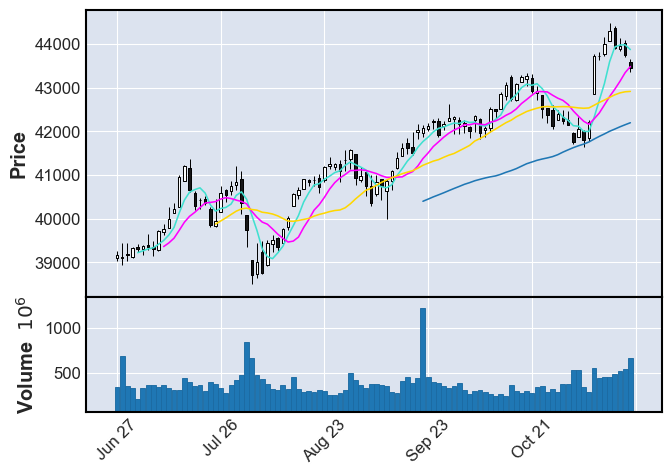

In [9]:
plotSinaStock(stock_dji_daily_df,100)

#### 2.1.3 美国纳斯达克

In [10]:
stock_nasdaq_daily_df = ak.stock_us_daily(symbol=".IXIC", adjust="")
stock_nasdaq_daily_df

,date,open,high,low,close,volume
0,2004-01-02,2011.0800,2022.3700,1999.7700,2006.6801,1.666780e+09
1,2004-01-05,2020.7800,2047.3600,2020.7800,2047.3600,2.362910e+09
2,2004-01-06,2044.5500,2061.5400,2039.6300,2057.3701,2.273220e+09
3,2004-01-07,2056.7500,2078.0901,2047.0200,2077.6799,2.294280e+09
4,2004-01-08,2089.6001,2100.2500,2078.0500,2100.2500,2.683950e+09
...,...,...,...,...,...,...
5250,2024-11-11,19355.3379,19366.0684,19193.2871,19298.7637,7.185259e+09
5251,2024-11-12,19289.8145,19343.0449,19168.5234,19281.4004,6.935192e+09
5252,2024-11-13,19286.4570,19358.4824,19191.1270,19230.7402,8.799507e+09
5253,2024-11-14,19256.0898,19275.8047,19073.3926,19107.6504,7.946575e+09


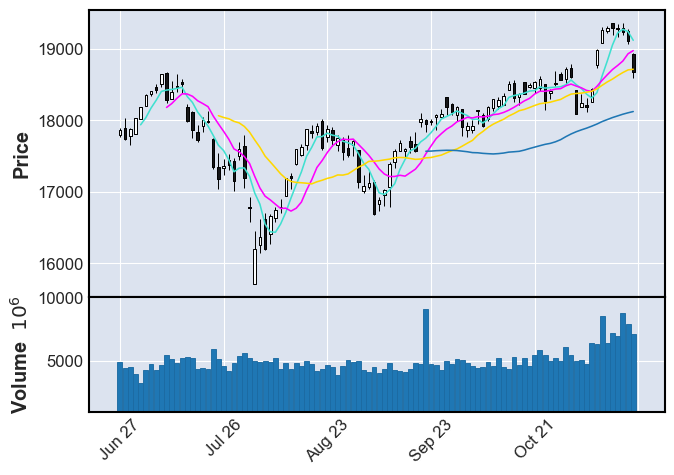

In [11]:
plotSinaStock(stock_nasdaq_daily_df,100)

### 2.2 股指期货市场

#### 中证50期货指数

In [12]:
futures_zh_daily_sina_df = ak.futures_zh_daily_sina(symbol="RB0")
futures_zh_daily_sina_df

,date,open,high,low,close,volume,hold,settle
0,2009-03-27,3550.0,3663.0,3513.0,3561.0,354590,45548,0.0
1,2009-03-30,3550.0,3580.0,3528.0,3544.0,145168,48380,0.0
2,2009-03-31,3538.0,3566.0,3531.0,3549.0,70592,44714,0.0
3,2009-04-01,3560.0,3561.0,3543.0,3547.0,28100,42076,0.0
4,2009-04-02,3545.0,3548.0,3456.0,3473.0,235446,68888,0.0
...,...,...,...,...,...,...,...,...
3793,2024-11-11,3348.0,3388.0,3307.0,3331.0,2744850,1832000,3342.0
3794,2024-11-12,3333.0,3353.0,3308.0,3344.0,2032597,1817779,3328.0
3795,2024-11-13,3344.0,3367.0,3323.0,3337.0,1899234,1761405,3344.0
3796,2024-11-14,3345.0,3350.0,3304.0,3313.0,1803371,1804836,3326.0


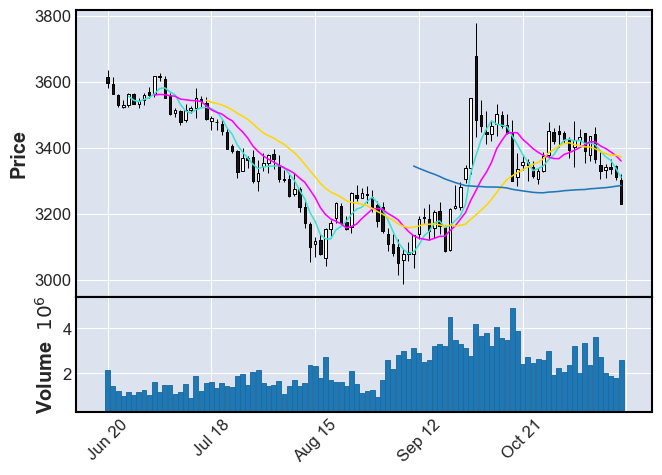

In [13]:
plotSinaStock(futures_zh_daily_sina_df,100)

### 2.3 期权市场

## 3. 板块热点
### 2.1 昨日热点10大板块
昨天涨停股票分布的板块

In [14]:
stock_zt_pool_em_df = ak.stock_zt_pool_em(date=lastday)
stock_zt_pool_em_df

,序号,代码,名称,涨跌幅,最新价,成交额,流通市值,总市值,换手率,封板资金,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数,所属行业
0,1,000557,西部创业,10.058026,5.69,33804244,8.295543e+09,8.298152e+09,0.407499,316079545,092500,092500,0,1/1,1,物流行业
1,2,000597,东北制药,10.035843,6.14,74220566,8.638155e+09,8.774694e+09,0.859218,91146458,092500,092500,0,2/2,2,化学制药
2,3,000716,黑芝麻,10.000000,7.15,49573095,5.009946e+09,5.387450e+09,0.989494,224804580,092500,092500,0,5/5,5,食品饮料
3,4,000795,英洛华,10.036496,12.06,2677434864,1.367223e+10,1.367223e+10,19.590734,101133399,092500,112639,9,6/6,6,小金属
4,5,000981,山子高科,10.303030,1.82,1095518432,1.187578e+10,1.819540e+10,9.368851,148967869,092500,093927,2,3/3,3,汽车零部
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,603198,迎驾贡酒,10.001623,67.75,970555440,5.420000e+10,5.420000e+10,1.842036,16022062,144952,144952,0,1/1,1,酿酒行业
195,196,837592,华信永道,30.000002,89.05,826798352,3.400037e+09,5.534458e+09,29.206301,30714146,145300,145300,0,1/1,1,软件开发
196,197,600678,四川金顶,9.973405,8.27,689245168,2.886147e+09,2.886147e+09,24.731943,13995321,145330,145330,0,1/1,1,水泥建材
197,198,000995,皇台酒业,10.000000,16.28,539117008,2.888202e+09,2.888202e+09,19.287107,25383776,145400,145400,0,1/1,1,酿酒行业


In [15]:
#返回当日涨停股票DataFrame
def limitupList(date):
    collist=['所属行业','代码','名称','涨跌幅','首次封板时间','最后封板时间','炸板次数','涨停统计','连板数']
    stock_zt_pool_em_df = ak.stock_zt_pool_em(date=date)
    last_hs_10=stock_zt_pool_em_df[collist]
    return last_hs_10

last_hs_10=limitupList(lastday)
last_hs_10

,所属行业,代码,名称,涨跌幅,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数
0,光学光电,002765,蓝黛科技,9.960938,092500,092500,0,6/6,6
1,食品饮料,000716,黑芝麻,10.000000,092500,092500,0,5/5,5
2,房地产开,002146,荣盛发展,10.138248,092500,092500,0,7/4,3
3,文化传媒,002400,省广集团,10.028248,092500,092500,0,6/3,2
4,汽车零部,002547,春兴精工,10.126582,092500,092500,0,2/2,2
...,...,...,...,...,...,...,...,...,...
194,酿酒行业,603198,迎驾贡酒,10.001623,144952,144952,0,1/1,1
195,软件开发,837592,华信永道,30.000002,145300,145300,0,1/1,1
196,水泥建材,600678,四川金顶,9.973405,145330,145330,0,1/1,1
197,酿酒行业,000995,皇台酒业,10.000000,145400,145400,0,1/1,1


热点追踪：涨停行业汇总明细

In [16]:
grouped_df=last_hs_10.groupby('所属行业',observed=False).size().reset_index(name='计数')
grouped_df['占比']=grouped_df['计数']/grouped_df['计数'].sum()

sort_df=grouped_df.sort_values(by='计数', ascending=False)
sort_df.head(20)

,所属行业,计数,占比
58,食品饮料,14,0.070352
52,软件开发,14,0.070352
16,商业百货,13,0.065327
56,酿酒行业,13,0.065327
23,房地产开,13,0.065327
33,汽车零部,9,0.045226
5,光学光电,8,0.040201
7,农牧饲渔,7,0.035176
50,证券,6,0.030151
22,工程建设,6,0.030151


In [17]:
top_10 = sort_df.head(10)
total_cumulative = top_10['占比'].sum()
judge='集中' if total_cumulative>0.5 else '不集中'
print(f'前10板块涨幅靠前累计占比：{total_cumulative}, 热点{judge}。')

前10板块涨幅靠前累计占比：0.5175879396984925, 热点集中。


### 2.2 今日热点
  

![今日涨幅国泰君安APP](gtja.png)

定时任务运行器：集合竞价和开盘前30分钟

In [18]:
import dolphindb as ddb
from concurrent.futures import ThreadPoolExecutor

# 初始化 DolphinDB 连接
s = ddb.session()
s.connect("localhost", 8848, "admin", "123456")  # 替换为实际的主机、端口、用户名和密码

# 创建 DolphinDB 表
s.run("""
if (existsDatabase("dfs://Quote")) {
    dropDatabase("dfs://Quote")
}
t = table(1:0, `timestamp`sym`sell_5`sell_5_vol`sell_4`sell_4_vol`sell_3`sell_3_vol`sell_2`sell_2_vol`sell_1`sell_1_vol`buy_1`buy_1_vol`buy_2`buy_2_vol`buy_3`buy_3_vol`buy_4`buy_4_vol`buy_5`buy_5_vol`最新`均价`涨幅`涨跌`总手`金额`换手`量比`最高`最低`今开`昨收`涨停`跌停`外盘`内盘, [TIMESTAMP, SYMBOL, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE])
database("dfs://Quote", VALUE, t)
""")

RuntimeError: Server response: 't = table(1 : 0, ["timestamp","sym","sell_5","sell_5_vol","sell_4","sell_4_vol","sell_3","sell_3_vol","sell_2","sell_2_vol","sell_1","sell_1_vol","buy_1","buy_1_vol","buy_2","buy_2_vol","buy_3","buy_3_vol","buy_4","buy_4_vol","buy_5","buy_5_vol","最新","均价","涨幅","涨跌","总手","金额","换手","量比","最高","最低","今开","昨收","涨停","跌停","外盘","内盘"], [12,17,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16]) => The number of column names should be the same as the number of data types.' script: '
if (existsDatabase("dfs://Quote")) {
    dropDatabase("dfs://Quote")
}
t = table(1:0, `timestamp`sym`sell_5`sell_5_vol`sell_4`sell_4_vol`sell_3`sell_3_vol`sell_2`sell_2_vol`sell_1`sell_1_vol`buy_1`buy_1_vol`buy_2`buy_2_vol`buy_3`buy_3_vol`buy_4`buy_4_vol`buy_5`buy_5_vol`最新`均价`涨幅`涨跌`总手`金额`换手`量比`最高`最低`今开`昨收`涨停`跌停`外盘`内盘, [TIMESTAMP, SYMBOL, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE])
database("dfs://Quote", VALUE, t)
'

In [19]:


# 股票代码列表
symbols = ["stock_code1", "stock_code2", "stock_code3"]  # 替换为实际股票代码

def is_within_trading_hours(current_time):
    # 定义交易时间段
    morning_start = current_time.replace(hour=9, minute=15, second=0, microsecond=0)
    morning_end = current_time.replace(hour=11, minute=30, second=0, microsecond=0)
    afternoon_start = current_time.replace(hour=13, minute=0, second=0, microsecond=0)
    afternoon_end = current_time.replace(hour=15, minute=0, microsecond=0)
    
    return (morning_start <= current_time <= morning_end) or (afternoon_start <= current_time <= afternoon_end)

def fetch_and_store(symbol):
    # 获取当前时间
    current_time = datetime.now()

    if is_within_trading_hours(current_time):
        # 获取股票数据
        df = ak.stock_bid_ask_em(symbol=symbol)

        # 转换为字典
        data_dict = df.set_index('item').to_dict()['value']

        # 添加时间戳和股票代码到数据字典
        data_dict['timestamp'] = current_time
        data_dict['sym'] = symbol

        # 转换数据为 DataFrame
        transformed_df = pd.DataFrame([data_dict])

        # 将数据插入到 DolphinDB
        s.upload({"data": transformed_df})
        s.run("""
        append!(loadTable("dfs://Quote", "t"), data)
        """)

while True:
    # 使用多线程获取多个股票代码的数据
    with ThreadPoolExecutor(max_workers=len(symbols)) as executor:
        executor.map(fetch_and_store, symbols)

    # 每3秒检查一次
    time.sleep(3)

KeyboardInterrupt: 

#### 2.2.1 集合竞价概念板块排名

In [42]:
#记录排名
# basename: 板块类型（概念板块、行业板块）
# start_time, end_time: 排名时间段
# sector: 板块名称
def recordRank(basename,start_time,end_time):
    now = datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'{basename}{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        if basename=='conceptRank':
            rank=ak.stock_board_concept_name_em()
        elif basename=='industryRank':
            rank=ak.stock_board_industry_name_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('非指定时间段，没有数据源.')
            rank=pd.DataFrame()
    if not rank.empty:
        mvtotal=rank['总市值'].sum()
        rank['市值比']=rank['总市值']/mvtotal
        rank['上涨家数%']=rank['上涨家数']/(rank['上涨家数']+rank['下跌家数'])
        columns=['排名','板块名称','板块代码','涨跌幅','市值比','换手率','上涨家数%','领涨股票','领涨股票-涨跌幅']
        rank=rank[columns]
    return rank

#排名靠前的板块的股票明细排名
# sectorRankDf: 板块排名DataFrame(recordRank生成)
# sectorNum,stockNum: 返回板块数、股票数
def top5sectorStocks(basename,start_time,end_time,sectorRankDf,sectorNum=5,stockNum=5):
    top5={}
    now = datetime.now()
    tStr = start_time.strftime("%Y%m%d%H%M")
    if sectorRankDf.empty:
        print('非指定时间段，没有数据源。')
    else:
        print('排名前5领涨板块成分股列表。')
        for sym in sectorRankDf['板块名称'].to_list()[:5]:
            csvfile=f'{basename}_{sym}{tStr}.txt'
            if now.time() < end_time and now.time() >= start_time:
                if basename=='conceptRank':
                    top5[sym]=ak.stock_board_concept_cons_em(sym)
                else:
                    top5[sym]=ak.stock_board_industry_cons_em(sym)
                top5[sym].to_csv(csvfile)
            else:
                if os.path.exists(csvfile):
                    top5[sym]=pd.read_csv(csvfile)
                else:
                    print('No record stored and not available from source.')
                    top5[sym]=pd.DataFrame()

            if not top5[sym].empty:
                atotal=top5[sym]['成交额'].sum()
                top5[sym]['成交额比']=top5[sym]['成交额']/atotal
                columns=['代码','名称','涨跌幅','成交额','换手率','市盈率-动态','市净率']
                top5[sym]=top5[sym][columns][:stockNum]
                print(f'板块：{sym}:\n{top5[sym]}\n\n')
    return top5   

In [44]:
#当天集合竞价阶段概念板块排名
basename='conceptRank'
start_time = time(9, 15)
end_time = time(9, 31)
rank0=recordRank(basename,start_time,end_time)
rank0.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,昨日涨停_含一字,BK1050,8.35,0.003154,0.0,0.986900,亿能电力,29.96
1,2,昨日涨停,BK0815,8.17,0.003063,0.0,0.985507,盖世食品,29.61
2,3,昨日连板,BK0816,8.06,0.000234,0.0,1.000000,志晟信息,21.10
3,4,昨日连板_含一字,BK1051,8.01,0.000441,0.0,0.984848,志晟信息,21.10
4,5,预制菜概念,BK1025,3.51,0.000429,0.0,0.869565,盖世食品,29.61
5,6,水产养殖,BK0967,3.46,0.000181,0.0,0.857143,国联水产,20.00
6,7,社区团购,BK0965,3.31,0.000381,0.0,0.864865,国联水产,20.00
7,8,麒麟电池,BK1092,3.13,0.000768,0.0,1.000000,科创新源,16.23
8,9,中超概念,BK0635,3.13,0.000147,0.0,1.000000,华夏幸福,10.08
9,10,华为欧拉,BK1013,3.10,0.000219,0.0,1.000000,中国软件,9.93


In [45]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank0)

排名前5领涨板块成分股列表。
板块：昨日涨停_含一字:
       代码    名称    涨跌幅  成交额  换手率   市盈率-动态    市净率
0  837046  亿能电力  29.96  NaN  0.0   124.77   8.89
1  836826  盖世食品  29.61  NaN  0.0    67.37   8.40
2  832171  志晟信息  21.10  NaN  0.0   -70.05  13.12
3  300242  佳云科技  20.04  NaN  0.0   -66.13  10.06
4  300380  安硕信息  20.01  NaN  0.0  1310.77  23.63


板块：昨日涨停:
       代码    名称    涨跌幅  成交额  换手率   市盈率-动态    市净率
0  836826  盖世食品  29.61  NaN  0.0    67.37   8.40
1  832171  志晟信息  21.10  NaN  0.0   -70.05  13.12
2  300242  佳云科技  20.04  NaN  0.0   -66.13  10.06
3  300380  安硕信息  20.01  NaN  0.0  1310.77  23.63
4  688656   浩欧博  20.00  NaN  0.0   204.47   8.98


板块：昨日连板:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态    市净率
0  832171  志晟信息  21.10  NaN  0.0  -70.05  13.12
1  835508  殷图网联  11.12  NaN  0.0 -204.20  11.07
2     530  冰山冷热  10.09  NaN  0.0   42.33   1.71
3     566  海南海药  10.06  NaN  0.0  -23.44   5.22
4     639  西王食品  10.04  NaN  0.0   66.61   1.64


板块：昨日连板_含一字:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态    市净率
0  832171  

#### 2.2.3 开盘后15分钟概念板块排名

In [46]:
start_time = time(9, 31)
end_time = time(9, 52)
rank1=recordRank(basename,start_time,end_time)
rank1.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,昨日连板_含一字,BK1051,4.86,0.000433,4.71,0.794118,供销大集,9.92
1,2,6G概念,BK0964,4.75,0.000328,2.27,0.888889,通宇通讯,9.99
2,3,华为欧拉,BK1013,4.71,0.000223,5.39,0.875000,中国软件,9.99
3,4,天基互联,BK0921,4.54,0.000359,2.50,0.923077,中国卫通,10.00
4,5,昨日连板,BK0816,4.19,0.000229,4.40,0.794872,供销大集,9.92
5,6,UWB概念,BK0880,4.10,0.000262,1.26,1.000000,中电兴发,9.94
6,7,毫米波概念,BK1124,3.91,0.000287,2.27,0.868421,紫江企业,9.97
7,8,固态电池,BK0968,3.86,0.002891,1.39,0.960526,蓝海华腾,20.01
8,9,CPO概念,BK1128,3.38,0.000863,1.43,0.977273,通宇通讯,9.99
9,10,复合集流体,BK1113,3.37,0.000117,3.52,0.840000,诺德股份,10.02


排名前5概念板块领涨成分股

In [47]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank1)

排名前5领涨板块成分股列表。
板块：昨日连板_含一字:
       代码    名称    涨跌幅           成交额    换手率  市盈率-动态    市净率
0  688656   浩欧博  20.00  5.652179e+08   7.94  204.47   8.98
1  835508  殷图网联  19.80  1.518308e+08  13.03 -220.15  11.94
2  002547  春兴精工  10.11  2.681442e+07   0.51  -22.93  81.50
3  600340  华夏幸福  10.08  7.398900e+07   0.47   -5.29   2.71
4  000716   黑芝麻  10.07  1.516740e+09  27.62  106.52   2.35


板块：6G概念:
       代码    名称    涨跌幅           成交额    换手率   市盈率-动态   市净率
0  831961  创远信科  24.01  2.672932e+08  10.91  1382.89  4.69
1  301517  陕西华达  10.94  2.863932e+08  10.02   164.99  5.57
2  002792  通宇通讯   9.99  2.565855e+08   5.54   115.68  2.86
3  301050  雷电微力   9.43  5.588691e+08   4.38    31.34  5.37
4  300342  天银机电   8.87  7.436797e+08   8.33   125.25  6.01


板块：华为欧拉:
       代码    名称    涨跌幅           成交额    换手率  市盈率-动态    市净率
0  300379   东方通  19.98  1.348281e+09  13.53  -45.65   3.19
1  600536  中国软件   9.99  3.825126e+09   7.09 -124.11  25.72
2  688058   宝兰德   8.19  3.546214e+07   1.17  -42.78   4.23
3  300

#### 2.2.3 集合竞价行业板块涨跌幅

In [48]:
#当天集合竞价到开盘后30分钟涨跌幅排名
basename='industryRank'
start_time = time(9, 15)
end_time = time(9, 31)
rank3=recordRank(basename,start_time,end_time)
rank3.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,保险,BK0474,2.92,0.033406,0.0,1.000000,天茂集团,10.05
1,2,证券,BK0473,2.75,0.038979,0.0,0.979592,华林证券,10.02
2,3,酿酒行业,BK0477,2.68,0.040027,0.0,0.972222,中信尼雅,10.03
3,4,多元金融,BK0738,2.53,0.005631,0.0,0.952381,中航产融,10.04
4,5,房地产开发,BK0451,2.32,0.012942,0.0,0.948052,福星股份,10.16
5,6,商业百货,BK0482,2.22,0.005269,0.0,0.854545,大连友谊,10.09
6,7,汽车服务,BK1016,1.90,0.000672,0.0,0.909091,申华控股,10.08
7,8,软件开发,BK0737,1.90,0.023597,0.0,0.896552,志晟信息,21.10
8,9,食品饮料,BK0438,1.80,0.016545,0.0,0.819048,盖世食品,29.61
9,10,橡胶制品,BK1018,1.69,0.002780,0.0,0.766667,科创新源,16.23


行业板块中成分股

In [49]:
top5_industry_stocks=top5sectorStocks(basename,start_time,end_time,rank3)

排名前5领涨板块成分股列表。
板块：保险:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态   市净率
0     627  天茂集团  10.05  NaN  0.0  -52.39  1.07
1  601336  新华保险   3.56  NaN  0.0    6.62  2.00
2  601628  中国人寿   2.85  NaN  0.0   10.24  2.52
3  601319  中国人保   0.51  NaN  0.0    7.16  1.30
4  601318  中国平安   0.28  NaN  0.0    6.99  1.22


板块：证券:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态   市净率
0    2945  华林证券  10.02  NaN  0.0  123.60  7.52
1  601099   太平洋  10.02  NaN  0.0  214.22  4.05
2    2673  西部证券  10.01  NaN  0.0   46.00  1.58
3  600030  中信证券  10.00  NaN  0.0   24.89  2.14
4  601136  首创证券   9.09  NaN  0.0   73.83  5.68


板块：酿酒行业:
       代码    名称    涨跌幅  成交额  换手率    市盈率-动态   市净率
0  600084  中信尼雅  10.03  NaN  0.0  14303.80  6.08
1     929  兰州黄河  10.03  NaN  0.0    -31.62  2.98
2     799   酒鬼酒  10.01  NaN  0.0    276.02  5.18
3  600779   水井坊  10.00  NaN  0.0     19.91  6.01
4     860  顺鑫农业  10.00  NaN  0.0     33.48  2.38


板块：多元金融:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态   市净率
0  600705  中航产融  10.04  NaN  0.0   59.30  

#### 2.2.4 开盘15分钟行业板块涨跌幅

In [50]:
basename='industryRank'
start_time = time(9, 31)
end_time = time(9, 51)
rank4=recordRank(basename,start_time,end_time)
rank4.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,电池,BK1033,4.33,0.021012,1.71,1.000000,诺德股份,10.02
1,2,通信设备,BK0448,3.24,0.015606,1.94,0.943925,恒宝股份,9.95
2,3,能源金属,BK1015,2.62,0.003638,1.61,1.000000,腾远钴业,5.38
3,4,汽车服务,BK1016,2.49,0.000684,2.70,0.769231,浩物股份,9.90
4,5,软件开发,BK0737,2.40,0.023535,2.47,0.867347,中安科,9.90
5,6,计算机设备,BK0735,2.22,0.009724,2.31,0.920000,御银股份,10.06
6,7,电子元件,BK0459,2.10,0.018866,1.20,0.913043,科力远,9.96
7,8,电机,BK1030,2.08,0.001860,1.60,0.840000,科力尔,10.02
8,9,航天航空,BK0480,1.99,0.010605,1.20,0.911111,晨曦航空,7.38
9,10,半导体,BK1036,1.87,0.044508,1.63,0.916667,国芯科技,20.01


行业板块中成分股

### 2.2.5 集合竞价阶段涨停个股热点明细

In [51]:
#在指定时段获取涨停数据，若时间不在指定时段，则读取历史最后一次下载的记录。
def stockLimitUp(start_time,end_time):
    now = datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'limitUp{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        rank=ak.stock_zh_a_spot_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('No record stored and not available from source.')
            rank=pd.DataFrame()
    if not rank.empty:
        columns=['代码','名称','涨跌幅','量比','换手率','市盈率-动态','市净率','流通市值','涨速','5分钟涨跌','60日涨跌幅','年初至今涨跌幅']
        rank=rank[columns].sort_values(by='涨跌幅', ascending=False)
    return rank

In [52]:
start_time = time(9, 15)
end_time = time(9, 31)
openA = stockLimitUp(start_time,end_time)
openA.head(50)

,代码,名称,涨跌幅,量比,换手率,市盈率-动态,市净率,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
0,837046,亿能电力,29.96,NaN,0.0,124.77,8.89,9.794611e+08,0.00,29.96,141.51,228.29
1,836826,盖世食品,29.61,NaN,0.0,67.37,8.40,1.244851e+09,-0.10,29.61,275.19,121.04
2,836504,博迅生物,23.60,NaN,0.0,122.83,6.95,3.918183e+08,-4.92,23.60,172.97,66.22
3,832171,志晟信息,21.10,NaN,0.0,-70.05,13.12,2.247998e+09,-4.44,21.10,441.40,198.30
4,300242,佳云科技,20.04,NaN,0.0,-66.13,10.06,3.620066e+09,0.00,20.04,196.39,45.57
5,688262,国芯科技,20.01,NaN,0.0,-55.21,4.17,7.372739e+09,0.00,20.01,69.03,-4.94
6,300380,安硕信息,20.01,NaN,0.0,1310.77,23.63,8.067840e+09,0.00,20.01,265.70,198.63
7,300916,朗特智能,20.01,NaN,0.0,42.19,4.55,3.738761e+09,0.00,20.01,79.64,67.73
8,688656,浩欧博,20.00,NaN,0.0,204.47,8.98,7.241618e+09,0.00,20.00,421.05,234.23
9,300465,高伟达,20.00,NaN,0.0,275.96,13.40,8.845893e+09,0.00,20.00,190.75,98.20


### 2.2.6 开盘15分钟涨停个股热点明细


In [53]:
start_time = time(9, 31)
end_time = time(9, 53)
open15 = stockLimitUp(start_time,end_time)
open15.head(50)

,代码,名称,涨跌幅,量比,换手率,市盈率-动态,市净率,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
0,833580,科创新材,30.00,10.07,8.42,135.48,4.29,9.157003e+08,0.00,0.00,184.87,103.23
1,831627,力王股份,30.00,15.18,19.46,104.69,6.14,1.320722e+09,0.00,0.00,252.63,136.07
2,831961,创远信科,24.01,9.74,10.91,1382.89,4.69,2.608556e+09,0.24,-2.52,152.45,80.45
3,603205,C健尔康,22.73,4.88,32.31,82.83,7.41,2.528598e+09,2.85,4.97,487.10,487.10
4,300173,福能东方,20.08,22.97,8.73,477.02,4.74,4.305493e+09,0.00,0.00,68.88,19.35
5,300484,蓝海华腾,20.01,7.55,12.10,205.84,8.95,4.534630e+09,0.00,0.00,99.06,121.25
6,688262,国芯科技,20.01,13.03,4.49,-55.21,4.17,7.372739e+09,0.00,0.00,69.03,-4.94
7,688656,浩欧博,20.00,40.80,7.94,204.47,8.98,7.241618e+09,0.00,1.05,421.05,234.23
8,300801,泰和科技,20.00,23.58,7.18,40.14,1.88,2.751426e+09,0.00,0.00,45.22,20.99
9,300657,弘信电子,19.98,16.73,8.48,148.80,8.18,1.014701e+10,3.54,6.21,67.45,14.60


#### 2.2.7 板块动态评析

本轮行情启动股票热点追踪（需要从历史行情中组合分析，现有股票涨停池昨日和今日都不稳定）

In [54]:
from datetime import datetime, timedelta

def get_stock_zt_pool(start_date, end_date):
    current_date = datetime.strptime(start_date, '%Y%m%d')
    end_date = datetime.strptime(end_date, '%Y%m%d')
    
    concat_zt_df = pd.DataFrame()

    while current_date <= end_date:
        date_str = current_date.strftime('%Y%m%d')
        try:
            stock_zt_pool_strong_em_df = ak.stock_zt_pool_previous_em(date=date_str)
            stock_zt_pool_strong_em_df['日期'] = pd.to_datetime(date_str)
            concat_zt_df = pd.concat([concat_zt_df, stock_zt_pool_strong_em_df], ignore_index=True)
        except Exception as e:
            print(f"Error fetching data for {date_str}: {e}")
        
        current_date += timedelta(days=1)
    
    return concat_zt_df

In [55]:
syclestart='20240925'
#ak.stock_zt_pool_strong_em(date=syclestart)

In [56]:
#本轮行情启动日
syclestart='20240924'
result_df = get_stock_zt_pool(syclestart, lastday)
result_df

Error fetching data for 20240924: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240925: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240926: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240927: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240928: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240929: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240930: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241001: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241002: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data

,序号,代码,名称,涨跌幅,最新价,涨停价,成交额,流通市值,总市值,换手率,涨速,振幅,昨日封板时间,昨日连板数,涨停统计,所属行业,日期
0,1,831641,格利尔,12.564991,12.99,15.00,152578386,5.706415e+08,1.004322e+09,27.047590,1.405152,26.343155,112506,1,2/1,家电行业,2024-10-21
1,2,002645,华宏科技,2.207792,7.87,8.47,283804592,4.006390e+09,4.576606e+09,7.104751,0.897436,4.805195,133727,1,2/1,环保行业,2024-10-21
2,3,002778,中晟高科,4.532578,14.76,15.53,153711077,1.821846e+09,1.841359e+09,8.438035,0.888585,7.932011,105230,1,2/1,石油行业,2024-10-21
3,4,002678,珠江钢琴,-0.210084,4.75,5.24,156953763,6.448479e+09,6.459090e+09,2.561207,0.849257,7.563025,094403,1,2/1,家用轻工,2024-10-21
4,5,003011,海象新材,4.366029,17.45,18.39,180547627,1.355810e+09,1.791696e+09,13.395390,0.229753,6.638756,110300,1,2/1,塑料制品,2024-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,147,600667,太极实业,-1.872247,8.91,9.99,2822243728,1.876615e+10,1.876615e+10,15.062960,-0.335570,9.030837,111617,2,3/2,工程建设,2024-11-07
1992,148,002713,东易日盛,4.721030,4.88,5.13,346381552,2.007455e+09,2.047340e+09,17.358486,-0.408163,9.442060,105606,1,2/1,装修装饰,2024-11-07
1993,149,601216,君正集团,-2.226721,4.83,5.43,1600898768,4.075562e+10,4.075562e+10,3.939288,-0.412371,4.251012,145521,1,2/1,化学原料,2024-11-07
1994,150,600630,龙头股份,3.349282,10.80,11.50,1278234512,4.588505e+09,4.588505e+09,27.858692,-0.460829,9.665071,112402,1,2/1,纺织服装,2024-11-07


## 4.个股市场


### 4.1 跟进股票列表
#### 4.1.1 历史K线

In [57]:
def plotDcStockSingle(df,days):
    OCHLVDict={'日期':'Date','开盘':'Open','收盘':'Close','最高':'High','最低':'Low','成交量':'Volume'}
    print(f'{days}K线图')
    plotStock(df.tail(days),OCHLVDict)

In [58]:
#根据代码获取股票信息
#symbol:若是字符串，则返回单个股信息；若是列表，则遍历元素，返回相应列表。
def getStockInfo(symbol):
    if type(symbol).__name__=='str':
        stocknamedf=ak.stock_individual_info_em(symbol=symbol)
        stockname=stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1]
        stockIPO=stocknamedf.loc[stocknamedf['item']=='上市时间','value'][7]
        stockIndustry=stocknamedf.loc[stocknamedf['item']=='行业','value'][6]
        stockTAmount=stocknamedf.loc[stocknamedf['item']=='总股本','value'][2]
        stockFAmount=stocknamedf.loc[stocknamedf['item']=='流通股','value'][3]
        stockTValue=stocknamedf.loc[stocknamedf['item']=='总市值','value'][4]
        stockFValue=stocknamedf.loc[stocknamedf['item']=='流通市值','value'][5]
    else:
        stockname,stockIPO,stockIndustry,stockTAmount,stockFAmount,stockTValue,stockFValue=[],[],[],[],[],[],[]
        for sym in symbol:
            stocknamedf=ak.stock_individual_info_em(symbol=sym)
            stockname.append(stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1])
            stockIPO.append(stocknamedf.loc[stocknamedf['item']=='上市时间','value'][7])
            stockIndustry.append(stocknamedf.loc[stocknamedf['item']=='行业','value'][6])
            stockTAmount.append(stocknamedf.loc[stocknamedf['item']=='总股本','value'][2])
            stockFAmount.append(stocknamedf.loc[stocknamedf['item']=='流通股','value'][3])
            stockTValue.append(stocknamedf.loc[stocknamedf['item']=='总市值','value'][4])
            stockFValue.append(stocknamedf.loc[stocknamedf['item']=='流通市值','value'][5])
            
    return {'名称':stockname,'IPO':stockIPO,'行业':stockIndustry,'总股本':stockTAmount,'流通股':stockFAmount,'总市值':stockTValue,'流通市值':stockFValue}

#画指定周期的股票烛线图
def plotDcStocks(stocksymb,periods):
    stockDict={}
    for p in periods:
        stockdf = ak.stock_zh_a_hist(symbol=stocksymb,period=p)
        stockname=getStockInfo(stocksymb)['名称']
        stockDict[p]=stockdf
        print(f'{stockname}-周期：{p}\n{stockdf}')
        plotDcStockSingle(stockdf,100)
    stockDict['name']=stockname
    return stockDict

润和软件-周期：daily
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     2012-07-18  300339  28.00  23.90  28.00  23.21   150973  3.772116e+08   
1     2012-07-19  300339  24.40  24.07  25.30  23.71    93127  2.276391e+08   
2     2012-07-20  300339  24.00  24.19  24.78  23.92    61087  1.484579e+08   
3     2012-07-23  300339  23.51  23.20  23.59  21.78    60498  1.371628e+08   
4     2012-07-24  300339  23.60  25.52  25.52  23.50    81850  2.034769e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
2835  2024-11-04  300339  61.18  65.15  66.66  61.18  1472499  9.456472e+09   
2836  2024-11-05  300339  64.50  69.17  73.72  63.51  1896706  1.302115e+10   
2837  2024-11-06  300339  68.02  67.30  71.23  66.66  1513340  1.036907e+10   
2838  2024-11-07  300339  66.00  68.79  69.95  64.50  1408939  9.423211e+09   
2839  2024-11-08  300339  69.78  74.35  75.50  69.78   658644  4.824909e+09   

         振幅    涨跌幅   涨跌额    换手率  
0  

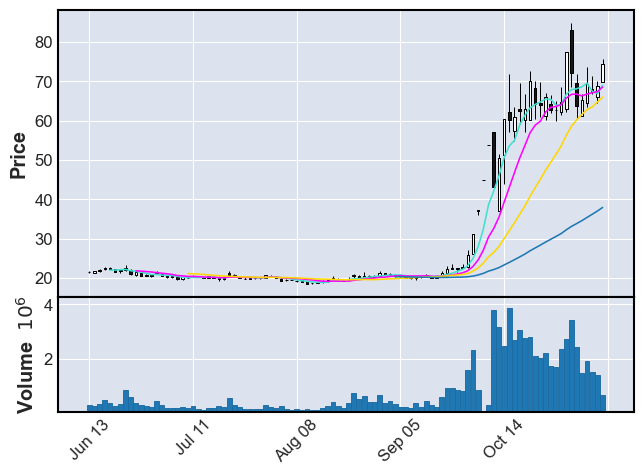

润和软件-周期：weekly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2012-07-20  300339  28.00  24.19  28.00  23.21    305187  7.533086e+08   
1    2012-07-27  300339  23.51  24.80  27.00  21.78    379070  9.502016e+08   
2    2012-08-03  300339  24.30  23.72  25.17  22.02    178747  4.147968e+08   
3    2012-08-10  300339  23.41  24.92  25.57  23.20    155756  3.791379e+08   
4    2012-08-17  300339  24.80  24.76  25.90  24.06     87260  2.188727e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
598  2024-10-11  300339  44.84  50.38  57.13  36.99   7308374  3.496253e+10   
599  2024-10-18  300339  51.30  62.95  71.80  44.00  14817974  9.110576e+10   
600  2024-10-25  300339  60.20  62.59  72.58  60.01  10846762  7.096691e+10   
601  2024-11-01  300339  62.66  63.58  84.84  60.00  12543368  8.772990e+10   
602  2024-11-08  300339  61.18  74.35  75.50  61.18   6950127  4.709481e+10   

        振幅    涨跌幅    涨跌额     换手率  
0

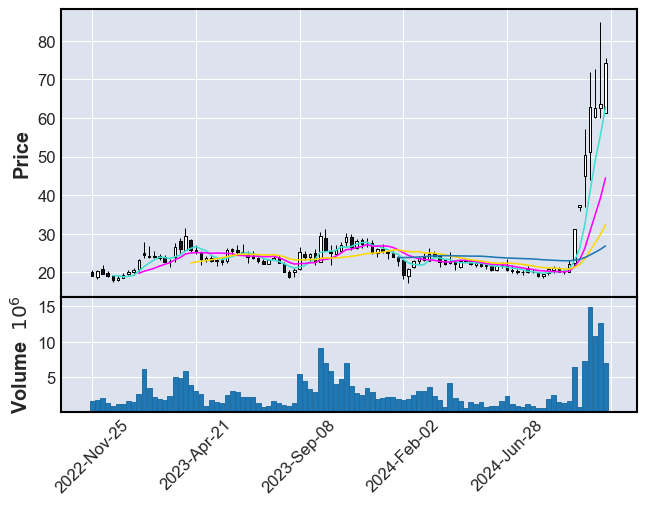

润和软件-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2012-07-31  300339  28.00  22.20  28.00  21.78    769468  1.904240e+09   
1    2012-08-31  300339  22.05  26.35  27.88  22.02    518439  1.285591e+09   
2    2012-09-28  300339  26.25  24.40  29.16  23.64    259629  6.996420e+08   
3    2012-10-31  300339  24.40  25.38  26.60  23.70     99730  2.513733e+08   
4    2012-11-30  300339  25.38  20.70  26.10  20.10     73468  1.762272e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
140  2024-07-31  300339  20.60  20.66  21.89  19.24   4915497  1.005085e+10   
141  2024-08-30  300339  20.51  21.24  21.76  18.47   6279256  1.266894e+10   
142  2024-09-30  300339  21.20  37.37  37.37  19.48  11942154  2.945327e+10   
143  2024-10-31  300339  44.84  72.00  84.84  36.99  43109486  2.690822e+11   
144  2024-11-08  300339  69.50  74.33  75.50  60.29   9357416  6.277993e+10   

         振幅    涨跌幅    涨跌额     换手率  

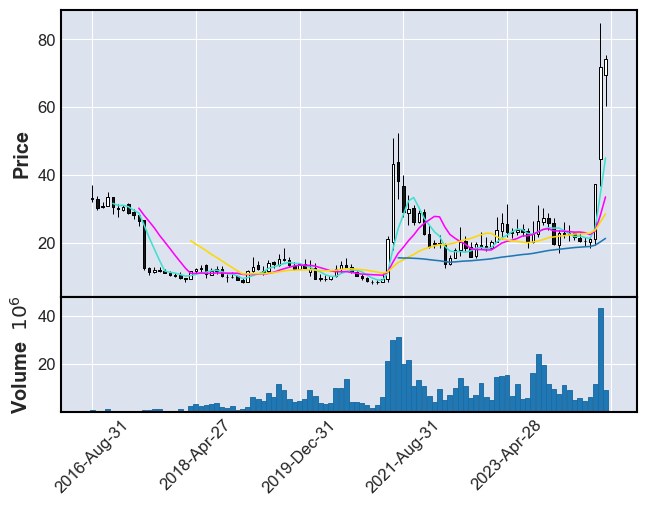

In [59]:
stocksymb='300339'
periods=['daily','weekly','monthly']
stockDict=plotDcStocks(stocksymb,periods)

### 4.1.2 盘口信息汇总
#### 4.1.2.1 成交和挂单明细
获取腾讯当日历史分笔数据

In [60]:
# 根据code代码返回“交易所+代码” 信息，或者反过来
def transferExSym(code):
    if len(code)>6:
        rescode=code[-6:]
    else:
        source={}
        source['sh']=ak.stock_sh_a_spot_em()['代码'].to_list()
        source['sz']=ak.stock_sz_a_spot_em()['代码'].to_list()
        source['bj']=ak.stock_bj_a_spot_em()['代码'].to_list()
        for k in source.keys():
            if code in source[k]:
                rescode=k+code
                break
    return rescode

In [61]:
import numpy as np
import matplotlib.pyplot as plt

#区分北交所和沪深股市，刻画市场深度。按照涨跌停板，作为极值，按照价格涨幅的measure度量区间
def priceMarketDepth(df,measure=0.01):

    open_price = df.loc[df['成交时间'] == '09:30:00', '成交价格'].iloc[0]

    # 设置涨跌停板系数
    if stocksymb == 'bj':
        limit_factor = 0.2
    else:
        limit_factor = 0.1

    # 计算最高价和最低价
    high_price = open_price * (1 + limit_factor)
    low_price = open_price * (1 - limit_factor)

    # 定义价格区间，每1%一档
    price_bins = np.round(np.arange(low_price, high_price, (high_price - low_price) * measure),2)

    # 将价格按照区间划分
    df['价格区间'] = pd.cut(df['成交价格'], bins=price_bins, right=False)

    # 按照价格区间汇总成交量
    volume_summary = df.groupby('价格区间',observed=False)['成交量'].sum().reset_index()

    # 新建 df['prop'] 列
    df['prop'] = df['性质'].apply(lambda x: -1 if x == '卖盘' else (1 if x == '买盘' else 0))
    
    # 按照价格区间汇总成交量和 prop 之和
    summary = df.groupby('价格区间',observed=False).agg({
        '成交量': 'sum',
        'prop': 'sum'
    }).reset_index()
    
    # 提取价格区间的中点和边界
    summary['价格'] = summary['价格区间'].apply(lambda x: round(x.mid,2))
    summary['起始价格'] = summary['价格区间'].apply(lambda x: round(x.left,2))
    summary['终止价格'] = summary['价格区间'].apply(lambda x: round(x.right,2))

    # 分离买盘和卖盘数据
    summary['买盘深度'] = summary['prop'].apply(lambda x: x if x > 0 else 0)
    summary['卖盘深度'] = -summary['prop'].apply(lambda x: -x if x < 0 else 0)

    # 绘制市场深度水平条形图
    fig, ax = plt.subplots(figsize=(14, 21))

    # 绘制买卖盘深度图
    ax.barh(summary['价格'], summary['买盘深度'], color='green', label='buy')
    ax.barh(summary['价格'], summary['卖盘深度'], color='red', label='sell')
    
    # 在图上标注区间价格的起始和终止价格
    for index, row in summary.iterrows():
        ax.text(row['买盘深度'] + max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["起始价格"]:.2f}', va='center', ha='left', fontsize=8, color='black')
        ax.text(-row['卖盘深度'] - max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["终止价格"]:.2f}', va='center', ha='right', fontsize=8, color='black')

    # 设置图表标题和标签
    ax.set_title('Market Depth')
    ax.set_xlabel('Depth(Amount)')
    ax.set_ylabel('Price')
    ax.legend()

    
    # 显示图表
    plt.show()
    
    return summary

In [62]:
from rich.console import Console
from rich.table import Table

#美观显示DataFrame表格
class DataFramePretty(object):
    def __init__(self, df: pd.DataFrame, min_max_cols=[]) -> None:
        self.data = df
        self.min_max_cols = min_max_cols

    def __set_min_max_style(self, df: pd.DataFrame):
        imax = self.data.idxmax()
        imin = self.data.idxmin()

        max_tmpl = "[b on red3]{}[/b on red3]"
        min_tmpl = "[i on green3]{}[/i on green3]"

        for col in self.min_max_cols:
            col_idx = imax.index.tolist().index(col)
            val = df.iloc[imax[col], col_idx]
            df.iloc[imax[col], col_idx] = max_tmpl.format(val)

            col_idx = imin.index.tolist().index(col)
            val = df.iloc[imin[col], col_idx]
            df.iloc[imin[col], col_idx] = min_tmpl.format(val)

    def show(self):
        table = Table(
            title="DataFrame",
            title_style="i on dark_cyan",
            header_style="bold cyan",
        )

        # self.data是原始数据
        # df 是用来显示的数据
        df = self.data.copy()
        for col in df.columns:
            df[col] = df[col].astype("str")
            table.add_column(col)

        self.__set_min_max_style(df)

        for idx in range(len(df)):
            table.add_row(*df.iloc[idx].tolist())

        console = Console()
        console.print(table)

In [63]:
#剔除中性单以后，列出活跃买卖市场深度
def plotActiveMarketDepth(stocksymbol):
    
    print(f'市场深度：{stocksymb}')
    #一次性获得历史分笔数据（当天即当天之前的交易时间；隔天即昨天）
    yesterdayTicks=ak.stock_zh_a_tick_tx_js(symbol=transferExSym(stocksymb))
    
    md=priceMarketDepth(yesterdayTicks)
    md = md[(md['买盘深度'] != 0) | (md['卖盘深度'] != 0)]
    mdp=DataFramePretty(md)
    mdp.show()
    return  md

剔除中性盘以后，主动买卖盘的市场深度

市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


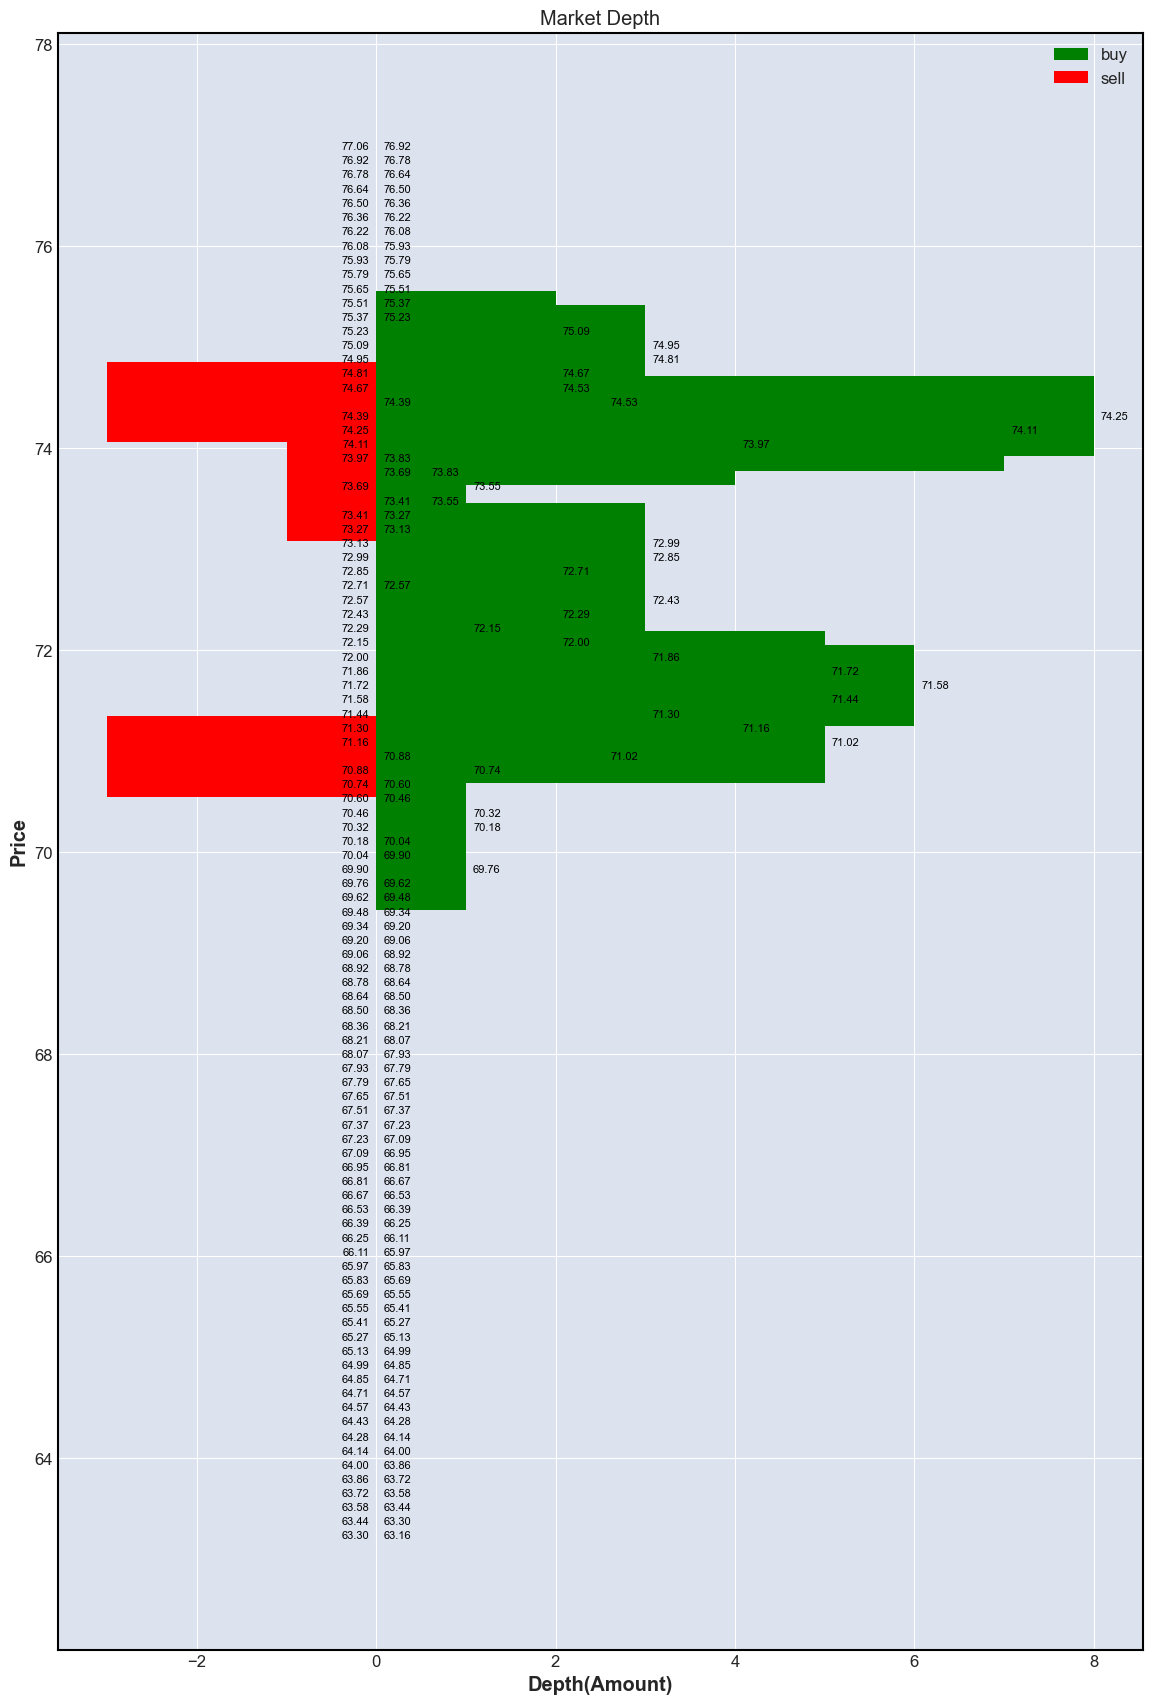

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [69.76, 69.9)  │ 9485   │ 1    │ 69.83 │ 69.76    │ 69.9     │ 1        │ 0        │
│ [70.18, 70.32) │ 11636  │ 1    │ 70.25 │ 70.18    │ 70.32    │ 1        │ 0        │
│ [70.32, 70.46) │ 3873   │ 1    │ 70.39 │ 70.32    │ 70.46    │ 1        │ 0        │
│ [70.74, 70.88) │ 1756   │ 1    │ 70.81 │ 70.74    │ 70.88    │ 1        │ 0        │
│ [70.88, 71.02) │ 20608  │ -3   │ 70.95 │ 70.88    │ 71.02    │ 0        │ -3       │
│ [71.02, 71.16) │ 14829  │ 5    │ 71.09 │ 71.02    │ 71.16    │ 5        │ 0        │
│ [71.16, 71.3)  │ 17509  │ 4    │ 71.23 │ 71.16    │ 71.3     │ 4        │ 0        │
│ [71.3, 71.44)  │ 15672  │ 3    │ 71.37 │ 71.3     │ 71.44    │ 3        │ 0        │
│ [71.44, 71.58) │ 34824  │ 5    │ 71.51 │ 71.44    │ 71.58    │ 5        │ 0        │
│ [71.58, 71.72) │ 16723  │ 6    │ 71.65 │ 71.58    │ 71.72    │ 6        │ 0        │
│ [71.72, 71.86) │ 6295   │ 5    │ 71.79 │ 71.72    │ 71.86    │ 5        │ 0        │
│ [71.86, 72.0)  │ 10661  │ 3    │ 71.93 │ 71.86    │ 72.0     │ 3        │ 0        │
│ [72.0, 72.15)  │ 5528   │ 2    │ 72.08 │ 72.0     │ 72.15    │ 2        │ 0        │
│ [72.15, 72.29) │ 6748   │ 1    │ 72.22 │ 72.15    │ 72.29    │ 1        │ 0        │
│ [72.29, 72.43) │ 18571  │ 2    │ 72.36 │ 72.29    │ 72.43    │ 2        │ 0        │
│ [72.43, 72.57) │ 4331   │ 3    │ 72.5  │ 72.43    │ 72.57    │ 3        │ 0        │
│ [72.71, 72.85) │ 18626  │ 2    │ 72.78 │ 72.71    │ 72.85    │ 2        │ 0        │
│ [72.85, 72.99) │ 25224  │ 3    │ 72.92 │ 72.85    │ 72.99    │ 3        │ 0        │
│ [72.99, 73.13) │ 9675   │ 3    │ 73.06 │ 72.99    │ 73.13    │ 3        │ 0        │
│ [73.41, 73.55) │ 13436  │ -1   │ 73.48 │ 73.41    │ 73.55    │ 0        │ -1       │
│ [73.55, 73.69) │ 24499  │ 1    │ 73.62 │ 73.55    │ 73.69    │ 1        │ 0        │
│ [73.69, 73.83) │ 22550  │ -1   │ 73.76 │ 73.69    │ 73.83    │ 0        │ -1       │
│ [73.97, 74.11) │ 39498  │ 4    │ 74.04 │ 73.97    │ 74.11    │ 4        │ 0        │
│ [74.11, 74.25) │ 35208  │ 7    │ 74.18 │ 74.11    │ 74.25    │ 7        │ 0        │
│ [74.25, 74.39) │ 27278  │ 8    │ 74.32 │ 74.25    │ 74.39    │ 8        │ 0        │
│ [74.39, 74.53) │ 35931  │ -3   │ 74.46 │ 74.39    │ 74.53    │ 0        │ -3       │
│ [74.53, 74.67) │ 34236  │ 2    │ 74.6  │ 74.53    │ 74.67    │ 2        │ 0        │
│ [74.67, 74.81) │ 25169  │ 2    │ 74.74 │ 74.67    │ 74.81    │ 2        │ 0        │
│ [74.81, 74.95) │ 32885  │ 3    │ 74.88 │ 74.81    │ 74.95    │ 3        │ 0        │
│ [74.95, 75.09) │ 44603  │ 3    │ 75.02 │ 74.95    │ 75.09    │ 3        │ 0        │
│ [75.09, 75.23) │ 10958  │ 2    │ 75.16 │ 75.09    │ 75.23    │ 2        │ 0        │
└────────────────┴────────┴──────┴───────┴──────────┴──────────┴──────────┴──────────┘

,价格区间,成交量,prop,价格,起始价格,终止价格,买盘深度,卖盘深度
47,"[69.76, 69.9)",9485,1,69.83,69.76,69.90,1,0
50,"[70.18, 70.32)",11636,1,70.25,70.18,70.32,1,0
51,"[70.32, 70.46)",3873,1,70.39,70.32,70.46,1,0
54,"[70.74, 70.88)",1756,1,70.81,70.74,70.88,1,0
55,"[70.88, 71.02)",20608,-3,70.95,70.88,71.02,0,-3
56,"[71.02, 71.16)",14829,5,71.09,71.02,71.16,5,0
57,"[71.16, 71.3)",17509,4,71.23,71.16,71.30,4,0
58,"[71.3, 71.44)",15672,3,71.37,71.30,71.44,3,0
59,"[71.44, 71.58)",34824,5,71.51,71.44,71.58,5,0
60,"[71.58, 71.72)",16723,6,71.65,71.58,71.72,6,0


In [64]:
plotActiveMarketDepth(stocksymb)

### 4.1.3 个股追踪
追踪股票列表

In [65]:
focusStocks=['300576','600839','600157','000717','002607','600127','600605','600217','300727','301421','002843','600968','300159','601688']
getInfo=getStockInfo(focusStocks)
Analist=pd.DataFrame({'代码':focusStocks,'名称':getInfo['名称'],'IPO':getInfo['IPO'],'行业':getInfo['行业'],'流通股':getInfo['流通股'],'总股本':getInfo['总股本']})
Analist['流通股']=Analist['流通股'].astype(int)
Analist['总股本']=Analist['总股本'].astype(int)
Analist['流通率']=Analist['流通股']/Analist['总股本']
Analist

,代码,名称,IPO,行业,流通股,总股本,流通率
0,300576,容大感光,20161220,电子化学品,183530814,295708699,0.620647
1,600839,四川长虹,19940311,家电行业,4614958631,4616244222,0.999722
2,600157,永泰能源,19980513,电力行业,22217764145,22217764145,1.000000
3,000717,中南股份,19970508,钢铁行业,2423523840,2423845590,0.999867
4,002607,中公教育,20110810,教育,5028744315,6167399389,0.815375
5,600127,金健米业,19980506,农牧饲渔,641783218,641783218,1.000000
6,600605,汇通能源,19920327,房地产服务,206282429,206282429,1.000000
7,600217,中再资环,19991216,环保行业,1388659782,1657653673,0.837726
8,300727,润禾材料,20171127,化学制品,113884049,127720867,0.891664
9,301421,波长光电,20230823,光学光电子,46308485,115718000,0.400184


容大感光-周期：daily
              日期    股票代码     开盘     收盘     最高     最低     成交量           成交额  \
0     2016-12-20  300576   9.89  11.87  11.87   9.89      84  9.803500e+04   
1     2016-12-21  300576  13.06  13.06  13.06  13.06      20  2.612000e+04   
2     2016-12-22  300576  14.37  14.37  14.37  14.37      11  1.580700e+04   
3     2016-12-23  300576  15.81  15.81  15.81  15.81      35  5.533500e+04   
4     2016-12-26  300576  17.39  17.39  17.39  17.39      39  6.782100e+04   
...          ...     ...    ...    ...    ...    ...     ...           ...   
1900  2024-11-04  300576  48.71  51.81  53.57  48.20  215250  1.101134e+09   
1901  2024-11-05  300576  51.35  54.47  55.48  51.35  314983  1.694437e+09   
1902  2024-11-06  300576  54.97  55.20  56.55  53.00  371166  2.041622e+09   
1903  2024-11-07  300576  55.30  55.78  57.98  53.80  379765  2.128891e+09   
1904  2024-11-08  300576  56.33  56.08  57.28  55.06   78243  4.382573e+08   

         振幅    涨跌幅   涨跌额    换手率  
0     24.03  44

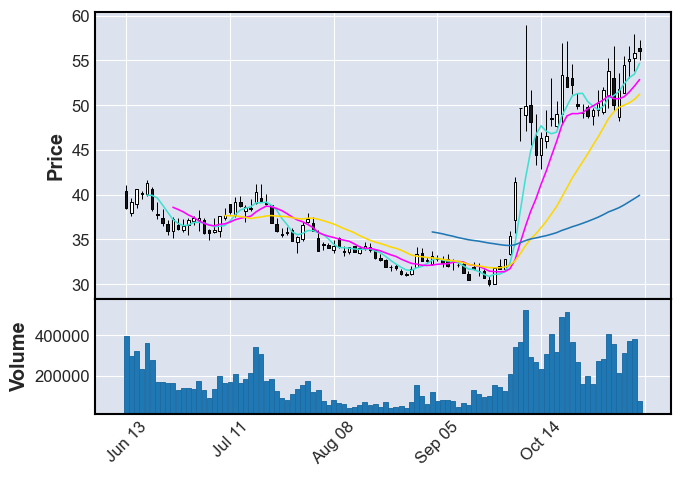

容大感光-周期：weekly
             日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0    2016-12-23  300576   9.89  15.81  15.81   9.89      150  1.952970e+05   
1    2016-12-30  300576  17.39  25.45  25.45  17.39      239  5.274280e+05   
2    2017-01-06  300576  28.00  37.27  37.27  28.00     1382  4.588265e+06   
3    2017-01-13  300576  41.00  44.99  49.00  41.00   274981  1.270494e+09   
4    2017-01-20  300576  44.10  41.00  44.30  38.47   266327  1.094907e+09   
..          ...     ...    ...    ...    ...    ...      ...           ...   
396  2024-10-11  300576  49.66  44.38  58.98  43.30  1453032  7.144060e+09   
397  2024-10-18  300576  44.39  53.35  56.98  42.87  1756876  8.646117e+09   
398  2024-10-25  300576  53.19  48.73  57.16  48.60  1506916  7.825647e+09   
399  2024-11-01  300576  48.75  50.02  56.56  47.76  1481663  7.649311e+09   
400  2024-11-08  300576  48.71  56.08  57.98  48.20  1359407  7.404341e+09   

        振幅    涨跌幅    涨跌额     换手率  
0    71.84  9

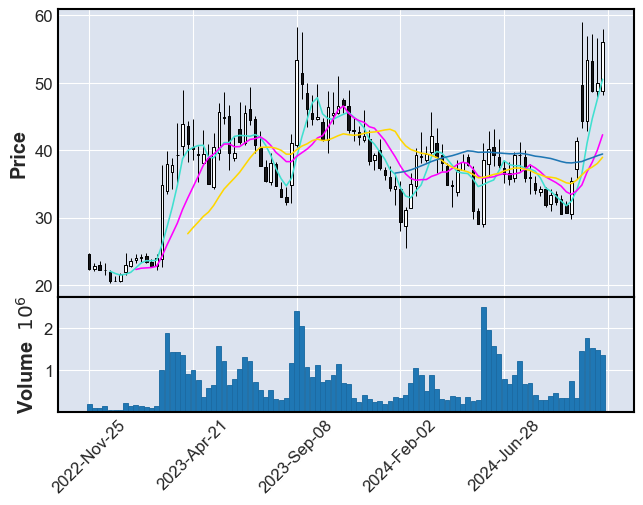

容大感光-周期：monthly
            日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0   2016-12-30  300576   9.89  25.45  25.45   9.89      389  7.227250e+05   
1   2017-01-26  300576  28.00  41.80  49.00  28.00   645691  2.793503e+09   
2   2017-02-28  300576  42.00  46.25  46.48  40.60   577638  2.535418e+09   
3   2017-03-31  300576  46.23  44.79  52.50  44.40   625741  3.038817e+09   
4   2017-04-28  300576  43.99  40.30  46.98  36.08   185168  7.561082e+08   
..         ...     ...    ...    ...    ...    ...      ...           ...   
91  2024-07-31  300576  36.57  36.60  41.20  33.53  3828562  1.447531e+10   
92  2024-08-30  300576  36.96  33.38  38.00  30.90  1650007  5.620156e+09   
93  2024-09-30  300576  33.45  41.38  41.97  29.78  2197749  7.319578e+09   
94  2024-10-31  300576  49.66  53.82  58.98  42.87  5840792  2.935311e+10   
95  2024-11-08  300576  53.00  56.09  57.98  48.20  1717144  9.316603e+09   

        振幅     涨跌幅    涨跌额     换手率  
0   188.83  208.86  17.

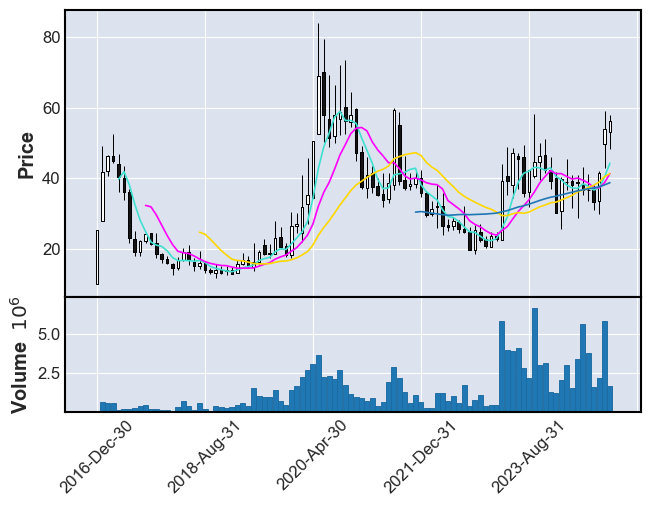

容大感光（300576）的市场深度：
市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


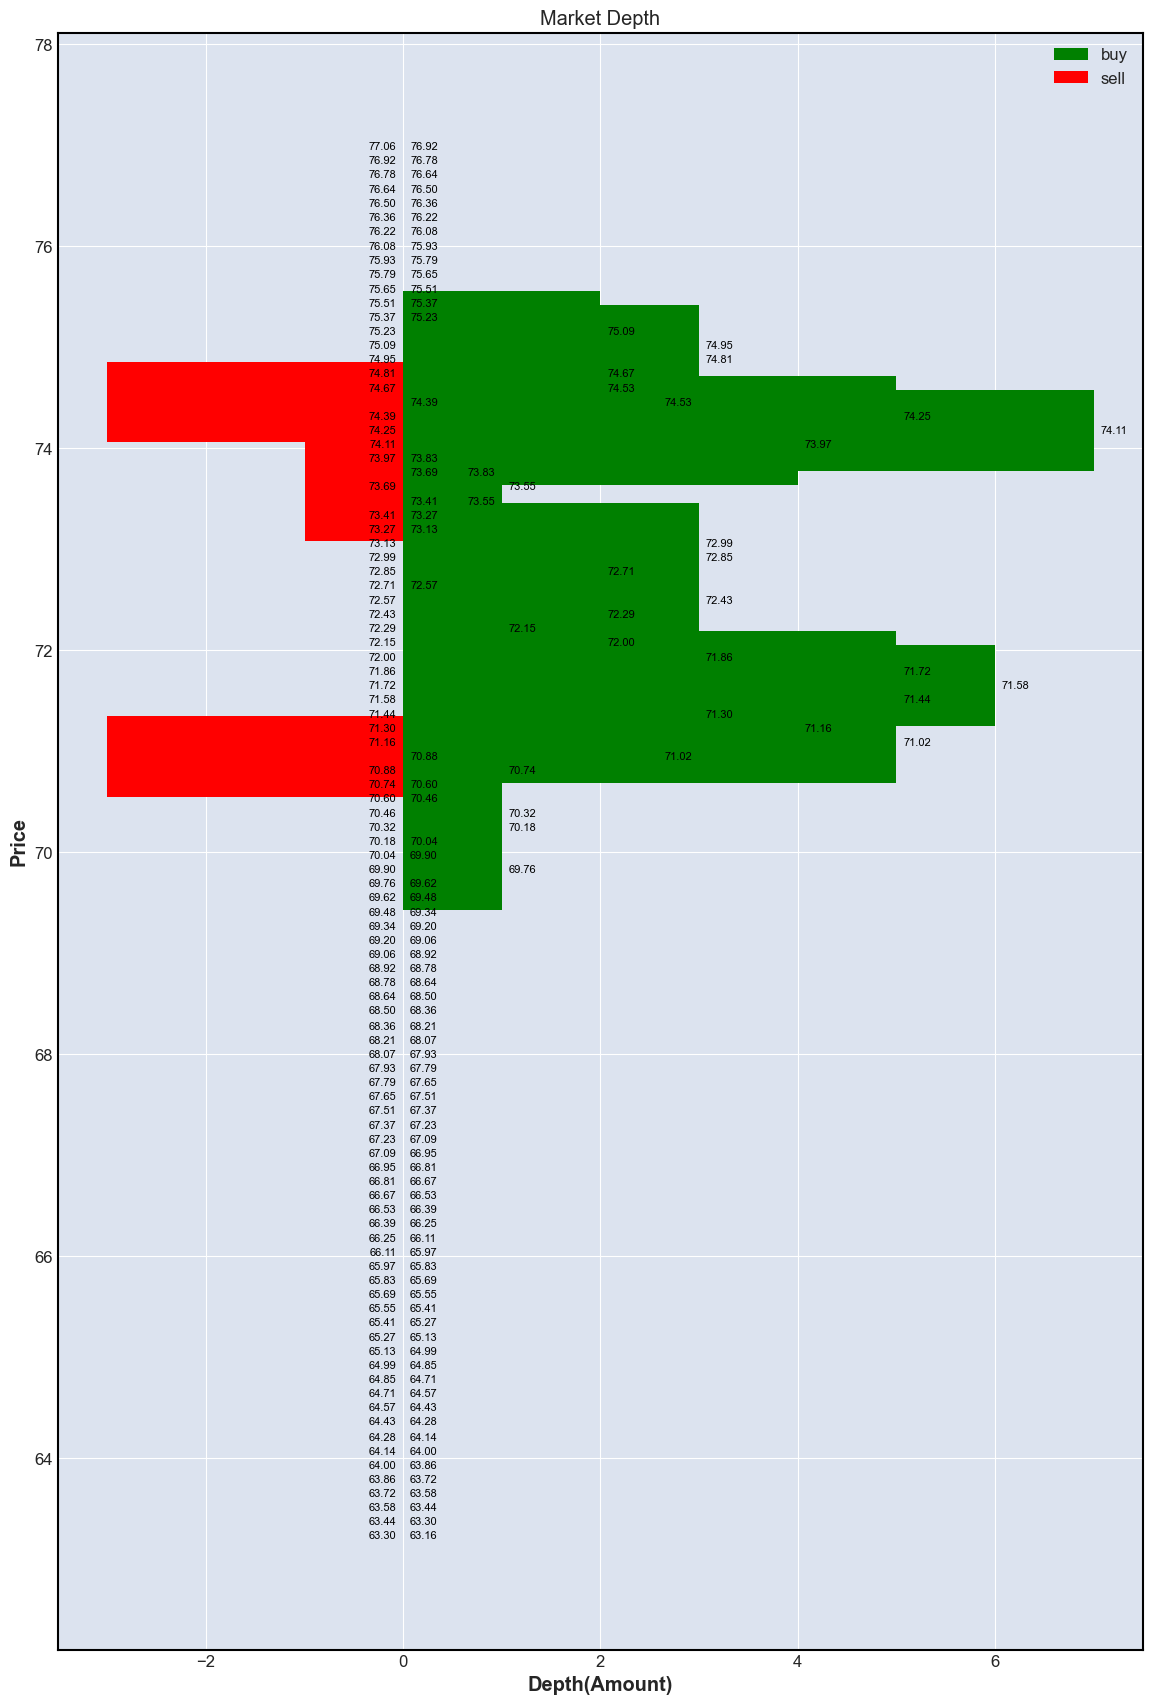

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [69.76, 69.9)  │ 9485   │ 1    │ 69.83 │ 69.76    │ 69.9     │ 1        │ 0        │
│ [70.18, 70.32) │ 11636  │ 1    │ 70.25 │ 70.18    │ 70.32    │ 1        │ 0        │
│ [70.32, 70.46) │ 3873   │ 1    │ 70.39 │ 70.32    │ 70.46    │ 1        │ 0        │
│ [70.74, 70.88) │ 1756   │ 1    │ 70.81 │ 70.74    │ 70.88    │ 1        │ 0        │
│ [70.88, 71.02) │ 20608  │ -3   │ 70.95 │ 70.88    │ 71.02    │ 0        │ -3       │
│ [71.02, 71.16) │ 14829  │ 5    │ 71.09 │ 71.02    │ 71.16    │ 5        │ 0        │
│ [71.16, 71.3)  │ 17509  │ 4    │ 71.23 │ 71.16    │ 71.3     │ 4        │ 0        │
│ [71.3, 71.44)  │ 15672  │ 3    │ 71.37 │ 71.3     │ 71.44    │ 3        │ 0        │
│ [71.44, 71.58) │ 34824  │ 5    │ 71.51 │ 71.44    │ 71.58    │ 5        │ 0        │
│ [71.58, 71.72) │ 16723  │ 6    │ 71.65 │ 71.58    │ 71.72    │ 6        │ 0        │
│ [71.72, 71.86) │ 6295   │ 5    │ 71.79 │ 71.72    │ 71.86    │ 5        │ 0        │
│ [71.86, 72.0)  │ 10661  │ 3    │ 71.93 │ 71.86    │ 72.0     │ 3        │ 0        │
│ [72.0, 72.15)  │ 5528   │ 2    │ 72.08 │ 72.0     │ 72.15    │ 2        │ 0        │
│ [72.15, 72.29) │ 6748   │ 1    │ 72.22 │ 72.15    │ 72.29    │ 1        │ 0        │
│ [72.29, 72.43) │ 18571  │ 2    │ 72.36 │ 72.29    │ 72.43    │ 2        │ 0        │
│ [72.43, 72.57) │ 4331   │ 3    │ 72.5  │ 72.43    │ 72.57    │ 3        │ 0        │
│ [72.71, 72.85) │ 18626  │ 2    │ 72.78 │ 72.71    │ 72.85    │ 2        │ 0        │
│ [72.85, 72.99) │ 25224  │ 3    │ 72.92 │ 72.85    │ 72.99    │ 3        │ 0        │
│ [72.99, 73.13) │ 9675   │ 3    │ 73.06 │ 72.99    │ 73.13    │ 3        │ 0        │
│ [73.41, 73.55) │ 13436  │ -1   │ 73.48 │ 73.41    │ 73.55    │ 0        │ -1       │
│ [73.55, 73.69) │ 24499  │ 1    │ 73.62 │ 73.55    │ 73.69    │ 1        │ 0        │
│ [73.69, 73.83) │ 22550  │ -1   │ 73.76 │ 73.69    │ 73.83    │ 0        │ -1       │
│ [73.97, 74.11) │ 39498  │ 4    │ 74.04 │ 73.97    │ 74.11    │ 4        │ 0        │
│ [74.11, 74.25) │ 35208  │ 7    │ 74.18 │ 74.11    │ 74.25    │ 7        │ 0        │
│ [74.25, 74.39) │ 29344  │ 5    │ 74.32 │ 74.25    │ 74.39    │ 5        │ 0        │
│ [74.39, 74.53) │ 35931  │ -3   │ 74.46 │ 74.39    │ 74.53    │ 0        │ -3       │
│ [74.53, 74.67) │ 34236  │ 2    │ 74.6  │ 74.53    │ 74.67    │ 2        │ 0        │
│ [74.67, 74.81) │ 25169  │ 2    │ 74.74 │ 74.67    │ 74.81    │ 2        │ 0        │
│ [74.81, 74.95) │ 32885  │ 3    │ 74.88 │ 74.81    │ 74.95    │ 3        │ 0        │
│ [74.95, 75.09) │ 44603  │ 3    │ 75.02 │ 74.95    │ 75.09    │ 3        │ 0        │
│ [75.09, 75.23) │ 10958  │ 2    │ 75.16 │ 75.09    │ 75.23    │ 2        │ 0        │
└────────────────┴────────┴──────┴───────┴──────────┴──────────┴──────────┴──────────┘

四川长虹-周期：daily
              日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0     1994-03-11  600839  16.80  19.69  20.50  16.60    261990  4.998470e+08   
1     1994-03-14  600839  21.00  19.80  21.50  19.40    107229  2.192590e+08   
2     1994-03-15  600839  19.80  19.25  20.48  19.12     37734  7.467700e+07   
3     1994-03-16  600839  19.20  19.28  20.02  19.10     24602  4.795900e+07   
4     1994-03-17  600839  19.55  18.60  19.59  18.02     16785  3.193100e+07   
...          ...     ...    ...    ...    ...    ...       ...           ...   
7280  2024-11-04  600839  13.38  14.99  15.50  13.35  12553240  1.788858e+10   
7281  2024-11-05  600839  14.50  14.43  15.34  13.82  10467233  1.511631e+10   
7282  2024-11-06  600839  14.30  13.24  14.30  13.00   9137181  1.254622e+10   
7283  2024-11-07  600839  12.85  13.26  13.91  12.00  10586742  1.329469e+10   
7284  2024-11-08  600839  13.27  13.03  13.35  12.65   1877312  2.452712e+09   

          振幅      涨跌幅    

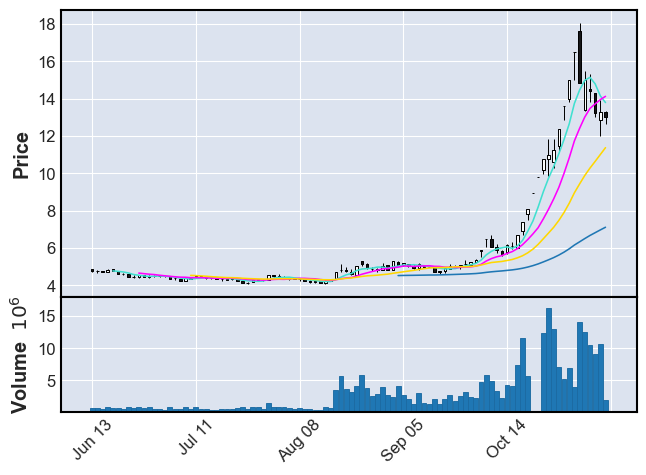

四川长虹-周期：weekly
              日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0     1994-03-11  600839  16.80  19.69  20.50  16.60    261990  4.998470e+08   
1     1994-03-18  600839  21.00  17.70  21.50  17.40    209638  4.154680e+08   
2     1994-03-25  600839  17.40  15.39  17.41  15.20     71628  1.181880e+08   
3     1994-04-01  600839  15.00  15.48  16.80  14.62    102736  1.609320e+08   
4     1994-04-08  600839  15.50  15.65  16.59  15.40     64293  1.025340e+08   
...          ...     ...    ...    ...    ...    ...       ...           ...   
1524  2024-10-11  600839   6.50   5.66   6.68   5.56  16405826  1.015380e+10   
1525  2024-10-18  600839   5.77   8.11   8.11   5.67  33013404  2.269582e+10   
1526  2024-10-25  600839   8.92  11.25  11.85   8.92  42141979  4.519061e+10   
1527  2024-11-01  600839  11.48  14.83  18.07  11.13  37351770  5.503133e+10   
1528  2024-11-08  600839  13.38  13.03  15.50  12.00  44625319  6.130322e+10   

          振幅      涨跌幅   

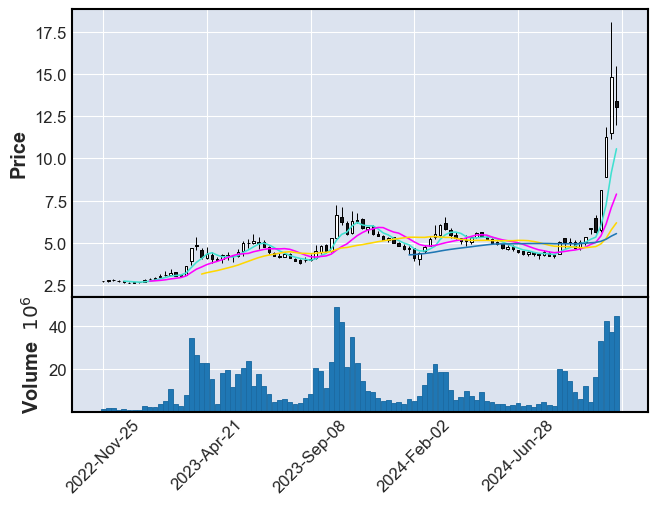

四川长虹-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0    1994-03-31  600839  16.80  15.41  21.50  14.62     638439  1.182779e+09   
1    1994-04-29  600839  15.59  12.91  16.59  12.40     268187  3.796230e+08   
2    1994-05-31  600839  13.00  13.90  16.10  12.86     351145  5.016150e+08   
3    1994-06-30  600839  13.98   9.28  14.75   9.08     243446  2.901890e+08   
4    1994-07-29  600839   9.20   7.33   9.22   7.15     143116  1.147780e+08   
..          ...     ...    ...    ...    ...    ...        ...           ...   
361  2024-07-31  600839   4.51   4.52   4.54   4.06   15152279  6.591300e+09   
362  2024-08-30  600839   4.52   5.04   5.28   4.09   47096018  2.259755e+10   
363  2024-09-30  600839   5.07   5.91   5.91   4.60   46917533  2.402882e+10   
364  2024-10-31  600839   6.50  16.48  16.48   5.56  114808656  1.102268e+11   
365  2024-11-08  600839  17.62  13.03  18.07  12.00   58729641  8.414794e+10   

         振幅      涨跌幅   

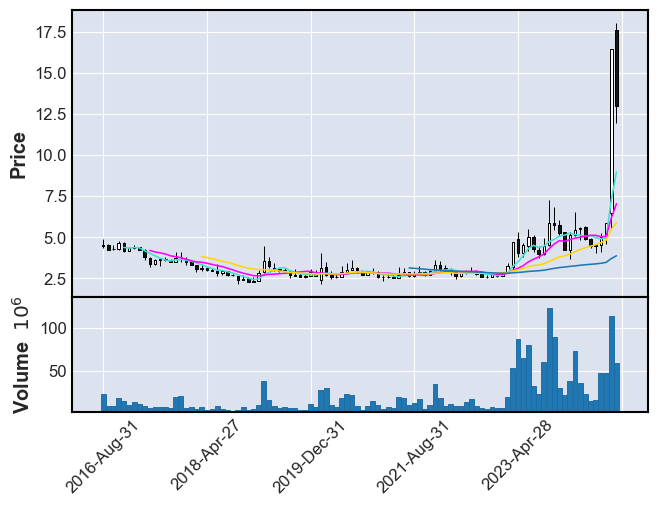

四川长虹（600839）的市场深度：
市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


In [ ]:
stockCharts,marketDepths={},{}

for f in focusStocks:
    print('='*75)
    stockCharts[f]=plotDcStocks(f,periods)
    stockname=stockCharts[f]['name']
    print(f'{stockname}（{f}）的市场深度：')
    marketDepths[f]=plotActiveMarketDepth(f)
    

In [ ]:
stock_bid_ask_em_df = ak.stock_bid_ask_em(symbol="600839")
stock_bid_ask_em_df

In [ ]:
import akshare as ak
import dolphindb as ddb
import pandas as pd
import time
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor

# 初始化 DolphinDB 连接
s = ddb.session()
s.connect("localhost", 8848, "admin", "123456")  # 替换为实际的主机、端口、用户名和密码

# 创建 DolphinDB 表
s.run("""
if (existsDatabase("dfs://Quote")) {
    dropDatabase("dfs://Quote")
}
t = table(1:0, `timestamp`sym`sell_5`sell_5_vol`sell_4`sell_4_vol`sell_3`sell_3_vol`sell_2`sell_2_vol`sell_1`sell_1_vol`buy_1`buy_1_vol`buy_2`buy_2_vol`buy_3`buy_3_vol`buy_4`buy_4_vol`buy_5`buy_5_vol`最新`均价`涨幅`涨跌`总手`金额`换手`量比`最高`最低`今开`昨收`涨停`跌停`外盘`内盘, [TIMESTAMP, SYMBOL, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE])
database("dfs://Quote", VALUE, t)
""")

def is_within_trading_hours(current_time):
    # 定义交易时间段
    morning_start = current_time.replace(hour=9, minute=15, second=0, microsecond=0)
    morning_end = current_time.replace(hour=11, minute=30, second=0, microsecond=0)
    afternoon_start = current_time.replace(hour=13, minute=0, second=0, microsecond=0)
    afternoon_end = current_time.replace(hour=15, minute=0, microsecond=0)
    
    return (morning_start <= current_time <= morning_end) or (afternoon_start <= current_time <= afternoon_end)

def fetch_and_store(symbol):
    # 获取当前时间
    current_time = datetime.now()

    if is_within_trading_hours(current_time):
        # 获取股票数据
        df = ak.stock_bid_ask_em(symbol=symbol)

        # 转换为字典
        data_dict = df.set_index('item').to_dict()['value']

        # 添加时间戳和股票代码到数据字典
        data_dict['timestamp'] = current_time
        data_dict['sym'] = symbol

        # 转换数据为 DataFrame
        transformed_df = pd.DataFrame([data_dict])

        # 将数据插入到 DolphinDB
        s.upload({"data": transformed_df})
        s.run("""
        append!(loadTable("dfs://Quote", "t"), data)
        """)

while True:
    # 使用多线程获取多个股票代码的数据
    with ThreadPoolExecutor(max_workers=len(focusStocks)) as executor:
        executor.map(fetch_and_store, focusStocks)

    # 每3秒检查一次
    time.sleep(3)
